# Курс "Тензорные и матричные компонентные модели и их применение в задачах машинного обучения"

## Автор: Харюк Павел, аспирант факультета ВМК МГУ имени М.В. Ломоносова
### Составлено: 2017-2018 гг.

# Занятие 1. Введение.

В курсе рассматриваются компонентные модели на основе матричных и тензорных разложений. Под компонентнами в данном случае понимаются структурные элементы разложений - в случае матричных факторизаций это векторы, в случае тензоров это могут быть как вектор-столбцы матриц, входящих в разложение, так и тензоры ранга 1 или тензорные ядра.

Компонентам часто приписывается ряд свойств, которые релевантны рассматриваемой задаче и позволяют их интерпретировать. С помощью компонентных моделей можно также моделировать внутреннюю структуру данных, проводить разведывательный анализ данных. 



Связанные дисциплины: обработка сигналов, машинное обучение, линейная алгебра, методы оптимизации.

## Признаковое пространство

Для применения математических моделей и методов необходимо формализовать характеристические свойства объекта изучения. Это позволяет извлекать информацию о процессе, явлении, объекте без знания всех или некоторой части деталей реализации этого объекта. Ярким примером важности такого подхода является неинвазивное медицинское обследование, при котором информацию о состоянии того или иного органа получают с помощью внешних измерений, не нарушающих целостности самого органа.

Таким образом, для изучаемого объекта можно составить набор характеристик и далее работать уже с самими характеристиками. Другими словами, для объекта можно построить **признаковое описание**, характеризующее данный объект. 

При наличии некоторого *набора объектов* можно составить таблицу признаковых описаний:

$$
\begin{array}{|r|cccc|}
\hline
 & \text{Объект 1} & \text{Объект 2} & \ldots & \text{Объект N} \\
\hline
\text{Признак 1} & v_{11} & v_{12} & \ldots & v_{1N} \\
\text{Признак 2} & v_{21} & v_{22} & \ldots & v_{2N} \\
\ldots & \ldots & \ldots & \ldots & \ldots \\
\text{Признак M} & v_{M1} & v_{M2} & \ldots & v_{MN} \\
\hline
\end{array},
$$
представляющую собой матрицу, строки которой соответствуют признакам, столбцы - объектам.
Важно: признаки не обязательно являются числовыми. Зафиксируем некоторый признак, обозначим множество его возможных значений как $\mathbb{D_f}$. По структуре множества $\mathbb{D_f}$ признаки принято разделять на 4 вида:

&nbsp; &nbsp; 1. бинарные: $\mathbb{D_f} = \{0, 1\}$;

&nbsp; &nbsp; 2. номинальные: $\mathbb{D_f}$ - конечное множество, $\mathbb{V} = \{a_i\}_{i=\overline{1, I}}$;

&nbsp; &nbsp; 3. порядковые: $\mathbb{D_f}$ - конечное упорядоченное множество;

&nbsp; &nbsp; 4. количественные: $\mathbb{D_f}$ - числовое пространство.

Математическая формализация признакового описания приводит к понятию **пространства признаков**, которое может быть определено следующим образом. Во-первых, под **признаком** будем понимать отображение $f: \mathbb{X} \to \mathbb{D_f}$, где $\mathbb{X}$ - множество объектов, $\mathbb{D_f}$ - множество допустимых значений признака. Если имеется набор признаков $\{f_m\}_{m=\overline{1, M}}$, то совокупность $\begin{pmatrix} f_1(X_k), & \ldots, & f_M(X_k) \end{pmatrix}$ называют **признаковым описанием** объекта $X_k \in \mathbb{X}$. **Признаковым пространством** является множество $\mathbb{D_{f_1}} \times \ldots \times \mathbb{D_{f_M}}$.

Здесь следует отметить, что часто для простоты изложения понятия "объект" и "признаковое описание объекта" отождествляются. Также поступим и мы. Процесс построения признакового описания, либо его преобразования называют **выделением признаков (feature extraction)**.

Важный случай объектов - сигналы.

#### Литература

http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F

http://www.machinelearning.ru/wiki/index.php?title=%D0%9F%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%B2%D0%BE%D0%B5_%D0%BE%D0%BF%D0%B8%D1%81%D0%B0%D0%BD%D0%B8%D0%B5

## Дискретные сигналы

Под сигналами принято понимать последовательности измерений во времени и/или пространстве. Такие измерения могут касаться как природных феноменов (температура, напряжённость магнитного поля, интенсивность поглощения и т.д.), так и созданных человеком объектов (индексы акций на фондовом рынке, сгенерированные нейросетями изображения и т.д.). Для обработки и генерирования сигналов удобно использовать математический аппарат, требующий построения математической модели сигнала.

Представляется естественным представлять сигнал как результат отображения $f$: $\mathbb{U} \to \mathbb{V}$. В зависимости от вида $U$ и $V$ можно ввести классификацию сигналов. В случае, если $\mathbb{U} = \mathbb{Z}$, говорят о **дискретных сигналах**. Такие сигналы можно записывать в виде векторов (вообще говоря, бесконечной длины):

$$f(n) = \begin{bmatrix} \ldots \\ f_{-2} \\ f_{-1} \\ f_0 \\ f_{1} \\ f_{2} \\ \ldots \\\end{bmatrix}$$

Дискретные сигналы разделяют на **сигналы конечной длительности (finite-length)** (область определения - ограниченное подмножество $\mathbb{Z}$), **бесконечной длительности (infinite-length)** (область определения - неограниченное подмножество $\mathbb{Z}$), **периодические (periodic)** $(\exists N \in \mathbb{N}: \forall n, k\in \mathbb{Z} \quad f[n] = f[n+kN])$, **с конечным носителем (finite-support)** (сигналы бесконечной длительности, которые не равны нулю на ограниченном подмножестве области определения). Последние две разновидности по сути представляют собой пару возможных способов представления сигналов конечной длины в виде бесконечных сигналов (в первом случае оригинал повторяется бесконечное число раз, во втором - дополняется нулями слева и справа).

Кроме того, легко ввести обобщение для многомерного случая:

$$f: \mathbb{Z}^d \to \mathbb{V}$$

И тогда такие уже *многомерные* сигналы можно записывать в виде многомерных массивов, используя мульти-индексацию, $f(n_1, \ldots, n_d)$. Такие массивы в вычислительной математике принято называть **тензорами**, речь о них пойдёт в следующем разделе.

#### Дополнение.

В качестве пространства $\mathbb{V}$ наиболее часто выбирают следующие:


&nbsp; &nbsp; 1. $\mathbb{V} = [0,1]$: двоичное представление (кодирование)

&nbsp; &nbsp; 2. $\mathbb{V} = \mathbb{R}$: вещественнозначный сигнал, примеры - показания датчиков температуры, скорости ветра и т.п.

&nbsp; &nbsp; 3. $\mathbb{V} = \mathbb{C}$: комплекснозначный сигнал, используется в тех случаях, когда важна не только амплитуда сигнала, но и его фаза; пример - измерения электромагнитной активности

#### Литература

Signal Processing for Communications by Paolo Prandoni and Martin Vetterli http://www.sp4comm.org/webversion.html

## Тензоры (вычислительная математика)

Под **тензором** в вычислительной математике понимают многомерный массив чисел. Одно- и двумерные примеры тензоров хорошо знакомы из линейной алгебры: это вектор и матрица. В данном разделе рассмотрим основные операции с тензорами и их обозначения.

Прежде всего, тензор будем обозначать заглавной буквой: $X \in \mathbb{V}^{n_1 \times \ldots \times n_d}$. Также удобно использовать обозначение массива с явным перечислением осей в круглых скобках: $X = X(\alpha_1, \ldots, \alpha_d)$. Элемент тензора будем обозначать с помощью индексации в квадратных скобках: $X[i_1, \ldots, i_d]$.  Очевидно, что в многомерных массивах можно переставлять оси (операция транспонирования), а также объединять их или разделять (для последней операции требуется, чтобы соответствующее $n_k$ раскладывалось на множители). Среди последних следует отметить три операции:

1) векторизация:

$${vec} : \mathbb{V}^{n_1 \times \ldots \times n_d} \to \mathbb{V}^{n_1 \cdot \ldots \cdot n_d}$$

2) построение матрицы развёртки ("матризация") по $k$-й оси:

$${unfold}_k : \mathbb{V}^{\prod\limits_{l=1}^{d} n_l} \to \mathbb{V}^{n_k \times \prod\limits_{l=1, l \neq k}^{d} n_l}$$

3) построение матрицы развёртки ("матризация") по первым $k$ осям:

$$\widehat{unfold}_k : \mathbb{V}^{\prod\limits_{l=1}^{d} n_l} \to \mathbb{V}^{\prod\limits_{l=1}^{k} n_l \times \prod\limits_{l=k+1}^{d} n_l}$$

Заметим, что векторизацию можно производить различным образом, требуется лишь установить правило перевода мультииндекса $(i_1, \ldots, i_d)$ в одиночный индекс $i$. Общепринято использовать следующее правило:
$i = \sum\limits_{p=1}^{d} \big( i_p \prod\limits_{q=1}^{p-1} i_q\big)$.

Фробениусова норма и скалярное произведения определяются аналогично матричному случаю:
$$X \in \mathbb{V}^{n_1 \times \ldots \times n_d}: \quad \| X \|_F^2 = \sum\limits_{(i_1, \ldots, i_d)} (X[i_1, \ldots, i_d])^2$$

$$X, Y \in \mathbb{V}^{n_1 \times \ldots \times n_d}: \quad \big(X, Y \big) = \sum\limits_{(i_1, \ldots, i_d)} X[i_1, \ldots, i_d] \cdot Y[i_1, \ldots, i_d]$$

Умножение по оси $\widehat{q}$ определяется следующим образом:
$$X \in \mathbb{V}^{n_1 \times \ldots n_{k-1} \times \widehat{q} \times n_{k+1} \times \ldots \times n_{d_X}}, \, Y \in \mathbb{V}^{m_1 \times \ldots m_{l-1} \times \widehat{q} \times m_{l+1} \times \ldots \times m_{d_Y}} : \quad Z[i_1, \ldots, i_{k-1}, i_{k+1}, \ldots, i_{d_X}, j_1, \ldots, j_{l-1}, j_{l+1}, \ldots, j_{d_Y}] = \sum\limits_{p=1} X[i_1, \ldots, i_{k-1}, p, i_{k+1}, \ldots, i_{d_X}] \cdot Y[j_1, \ldots, j_{l-1}, p, j_{l+1}, \ldots, j_{d_Y}] = X \times_{\widehat{q}} Y$$



С ростом размерности (числа осей) экспоненциально возрастает число элементов массива. Такая проблема носит название **проклятия размерности**. Существует несколько вариантов её решения. Например, если в массиве большое число нулевых элементов (то есть, если массив разрежен), то массив можно представить в разреженном формате, например, COO: для этого нужно определить набор из $(d+1)$ вектора, длина которых равна числу ненулевых элементов. Из них один хранит значения ненулевых элементов, оставшиеся - их координаты. Однако, нам интересна внутренняя структура тензоров, а именно извлечение их неявных параметров. Для этих целей используются тензорные разложения.

## Матричные и тензорные разложения

Здесь мы напомним известные из курсов вычислительных методов и линейной алгебры разложения: QR, SVD, разложение Шура, разложение Холецкого. Данные разложения используются в качестве составной части более сложных алгоритмов. Например, разложение Холецкого можно использовать внутри метода BFGS (Бройдена-Флетчера-Гольдфарба-Шанно), используемого для поиска решения задачи безусловной оптимизации. 

**Разложение Холецкого (квадратного корня)**
$$X = LDL^*, \\ X, L, D \in \mathbb{C}^{N \times N}, \, X = X^*, \, D = {diag}(d_1, \ldots, d_N), \\ L \text{ - нижняя треугольная}, \, L_{ii} = 1, \, i = \overline{1, N} $$

**Разложение Шура для матриц с комплексными элементами**:
$$X = Q^* T Q,\\ X, T, Q \in \mathbb{C}^{N \times N}, \, Q^*Q = I, \, T \text{ - верхняя треугольная}$$

**QR-разложение**
$$X = Q R, \\ X, Q \in \mathbb{C}^{M \times N}, \, R \in \mathbb{C}^{N \times N}, \, Q^* Q = I$$


**Сингулярное разложение комплекснозначной матрицы**:
$$X = U \Sigma V^*,\\X \in \mathbb{C}^{M \times N},\, U \in \mathbb{C}^{M \times M},\, \Sigma \in \mathbb{C}^{M \times N},\, V \in \mathbb{C}^{N \times N}\\ U^*U = I, \, V^* V = I, \, \Sigma_{ij} = 0 \forall i \neq j$$
Внедиагональные элементы $\Sigma$ при этом равны нулю.

С помощью сингулярного разложения можно вычислять компонентную модель PCA (principal component analysis, метод главных компонент). Об этой модели речь пойдёт в соответствующем разделе курса. 

Если удалить столбцы матриц $U$ и $V$, которые соответствуют нулевым сингулярным числам, а также сделать соответствующие измение с матрицей сингулярных чисел, то сингулярное разложение можно рассматривать как частный случай другого разложения.

**Скелетное разложение матрицы**
$$X = U \Lambda V^* = \sum\limits_{r=1}^{R} \lambda_r U_{\cdot, r} V^*_{\cdot, r}, \\ X \in \mathbb{C}^{M \times N},\, U \in \mathbb{C}^{M \times R},\, V \in \mathbb{C}^{N \times R},\, \Lambda = {diag}(\lambda_1, \ldots, \lambda_R) \in \mathbb{C}^{R \times R}$$

Если мы рассматриваем скелетное разложение как компонентную модель, то компонентами в данном случае являются столбцы матриц $U$ и $V$. Элементы матрицы $\Lambda$ указывают нам то, как эти компоненты связаны между собой.

В случае большего количества измерений скелетное разложение можно обобщить следующим образом. Заметим, что в двумерном случае оно включает в себя центрульную часть - диагональную матрицу, и две матрицы по числу размерностей. Таким образом, если число измерений равно $d$, то поместим в центр разложения единичный тензор размерности $d$, и каждую его моду умножим на свою матрицу:

$$X = ( \ldots ( I \times_1 A_1) \times_2 A_2) \times_3 \ldots )\times_d A_d \\ X \in \mathbb{C}^{M_1 \times \ldots \times M_d}, \, I \in \mathbb{C}^{R \times \ldots \times R}, \, A_k \in \mathbb{C}^{M_k \times R}, \, k = \overline{1, d}, \, I \text{ - единичный}$$

## Вычисление разложений

Для вычисления разложений удобно работать с задачами, сформулированными как **задачи оптимизации**. Так, одной из самых распространённых задач оптимизации является минимизация Фробениусовой нормы, задача наименьших квадратов. Одна из причин предпочтительности именно оптимизационной формулировки в том, что редко когда на практике удаётся получить точное представление исходных данных в виде, соответствующем модели. Иными словами, часто интересно *приближённое* соответствие модели, и тогда условие вида $X=AB^T$ можно заменить условием

$$\min\limits_{A, B} \| X - AB^T \|_F^2$$

Одним из довольно распространённых методов решения задачи наименьших квадратов является метод ALS (alternating least squares). В данном методе на каждом шаге последовательно фиксируются все параметры, кроме одного, по которому и происходит оптимизация. Таким образом, каждый шаг представим в виде:

$$\widehat{A} = \arg \min\limits_{A} \| X - AB^T \|_F^2$$
$$\widehat{B} = \arg \min\limits_{B} \| X - \widehat{A}B^T \|_F^2$$
$$\widehat{A} \to A, \quad \widehat{B} \to B$$

## Программирование в курсе

В данном курсе практическая работа запланирована на языке програмирования Python 2.7. Выбор объясняется просто:

1. высокоуровневый интерпретируемый язык - позволяет меньше обращать внимания на технические сложности и больше сконцентрироваться на обучении

2. бесплатный - не требует финансовых вложений

3. развитая экосистема - в частности, для научных целей: scipy (scientific python), matplotlib, numpy, Jupyter notebook

Есть и недостатки, такие как скорость работы программ (зависит от реализации; также есть возможность использовать вставки на C/C++/Fortran), GIL (global interpreter lock, ограничения на одновременное выполнение нескольких потоков).

Курс предполагает владение базовыми знаниями Python. В случае, если таких знаний нет или они требуют обновления, то в сети имеется достаточно большое количество курсов и материалов по этой теме, в частности:

1. Курс "Математика и Python для анализа данных" <https://www.coursera.org/learn/mathematics-and-python> (Coursera)

2. Курс "Программирование на Python" <https://stepik.org/course/67/syllabus> (Stepic)

3. Python Online Tutorial <https://www.learnpython.org/>

Для работы рекомендуется использовать дистрибутив Anaconda Python Distribution (python v. 2.7):

<https://www.anaconda.com/download/>

## Практика: numpy и тензоры

In [5]:
import numpy as np

# set up parameters
d = 3 # dimensionality
shift = 2 # helps us
n = range(shift, d+shift) # n_1, ..., n_d

# generate tensor with elements from standart normal distribution
print "1. Generating tensors"
A = np.random.normal(size=n)
print "tensor A: %d elements, %d axes, %.5f min.val., %.5e max.val." % (A.size, A.ndim, A.min(), A.max())
print

# find indices of the maximal/minimal element
print "2. Looking up for indices of conditioned values"
print np.where(A == A.max())
print np.where(A == A.min())
print

# Frobenius norm of A
print np.linalg.norm(A)
print np.sum(A**2.)**0.5

# Vectorize A
# WARNING: there are two order types: 'C' (default for numpy) and 'F'.
# We need 'F' (fortran order.)
vecA = A.flatten(order='F') 
print "Original mode sizes: ", A.shape
print "Vectorized size: ", vecA.shape

# Transpose A
sigma1 = range(d)
sigma2 = np.random.permutation(sigma1)
print "(shape) Transposed with sigma = ", sigma2
print np.transpose(A, sigma2).shape
# Transpose two modes
n1 = np.random.choice(d)
n2 = np.random.choice(d)
B = np.swapaxes(A, n1, n2)
print "(shape) swapped axes: %d, %d" % (n1, n2)
print B.shape

# k-mode multiplication ("contraction")
mode_k = np.random.choice(range(d))
B = np.random.uniform(-1, 1, size=[5, n[mode_k], 2])
C = np.tensordot(A, B, axes=([mode_k], [1]))
print "Contraction by %d mode of tensors with shapes %s and %s" % (mode_k, str(A.shape), str(B.shape))
print "... result: ", C.shape
# possible variant: np.einsum. More sophisticated to deal with arbitrary number of input dimensions

# getting subtensor of A:
# np.ix_

# shifting elements:


1. Generating tensors
tensor A: 24 elements, 3 axes, -2.62525 min.val., 1.46826e+00 max.val.

2. Looking up for indices of conditioned values
(array([1]), array([2]), array([1]))
(array([0]), array([1]), array([3]))

6.21187206501
6.21187206501
Original mode sizes:  (2, 3, 4)
Vectorized size:  (24,)
(shape) Transposed with sigma =  [1 0 2]
(3, 2, 4)
(shape) swapped axes: 2, 0
(4, 3, 2)
Contraction by 2 mode of tensors with shapes (2, 3, 4) and (5, 4, 2)
... result:  (2, 3, 5, 2)


## Практика: scipy и примеры сигналов

/home/pavel/apd/lib/python2.7/site-packages/scipy/signal/waveforms.py:236: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if t == 'cutoff':  # compute cut_off point


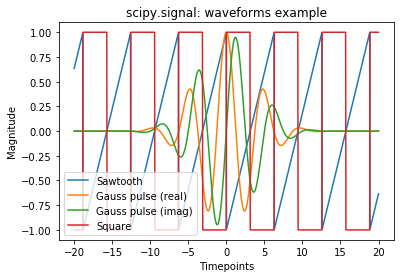

In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

plt.clf()

t = np.linspace(-20., 20., 1000.)

s1 = signal.sawtooth(t, width=1)
plt.plot(t, s1, label='Sawtooth')

s2, s2i = signal.gausspulse(t, fc=0.2, bw=0.5, bwr=-6, tpr=-60, retquad=1, retenv=False)
plt.plot(t, s2, label='Gauss pulse (real)')
plt.plot(t, s2i, label='Gauss pulse (imag)')

s3 = signal.square(t, duty=0.5)
plt.plot(t, s3, label='Square')
plt.xlabel("Timepoints")
plt.ylabel("Magnitude")
plt.title("scipy.signal: waveforms example")
#plt.grid(1)
plt.legend(loc='best')
plt.show()

## Практика: numpy и матричные разложения

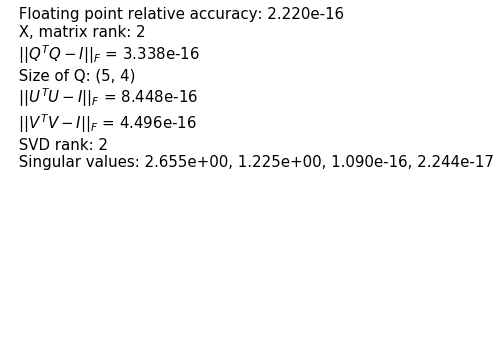

In [28]:
import numpy as np
import matplotlib.pyplot as plt

eps = np.spacing(1)
#print "Floating point relative accuracy: %e" % eps
string = " Floating point relative accuracy: %.3e" % (eps)

M = 5
N = 4
Rank = 2

A = np.random.uniform(size=(M, Rank))
B = np.random.normal(size=(N, Rank))

X = np.dot(A, B.T)
#print "X, matrix rank: %d" % (np.linalg.matrix_rank(X))
string += "\n X, matrix rank: %d" % (np.linalg.matrix_rank(X))

Q, R = np.linalg.qr(X)
#print "\|Q^T Q - I\|^2_F = %e" % np.linalg.norm(np.dot(Q.T, Q) - np.eye(Q.shape[1]))
#print "Size of Q: ", Q.shape

string += "\n $||Q^T Q - I||_F$ = %.3e" % np.linalg.norm(np.dot(Q.T, Q) - np.eye(Q.shape[1]))
string += "\n Size of Q: " + str(Q.shape)

U, S, Vt = np.linalg.svd(X, full_matrices=0)
V = Vt.T
#print "\|U^T U - I\|^2_F = %e" % (np.linalg.norm(np.dot(U.T, U) - np.eye(U.shape[1])))
#print "\|U^T U - I\|^2_F = %e" % (np.linalg.norm(np.dot(V.T, V) - np.eye(V.shape[1])))
#print "SVD rank: %d" % S[S > eps].size
#print "Singular values: ", S

string += "\n $||U^T U - I||_F$ = %.3e" % (np.linalg.norm(np.dot(U.T, U) - np.eye(U.shape[1])))
string += "\n $||V^T V - I||_F$ = %.3e" % (np.linalg.norm(np.dot(V.T, V) - np.eye(V.shape[1])))
string += "\n SVD rank: %d" % (S[S > eps].size)
S = map(lambda x: "%.3e" % (x), S)
string += "\n Singular values: " + reduce(lambda x, y: x+', '+y, S)

plt.clf()
plt.text(0.01, 0.8, string,fontsize=15)
fig = plt.gca()
fig.axes.set_frame_on(False)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()

## Удалённая работа

Для выполнения домашних работ и подготовки проектов для экзамена предоставляется учётная запись на удалённом кластере с доступом по ssh. Для запуска сессии используется команда:

```bash
ssh -p 22 username@server
```

Внутри сессии занятость ресурсов и контроль за запущенными задачами можно осуществлять с помощью команд **top / htop**. Для выхода нужно нажать **q**.

Запуск задач в фоновом режиме рекомендуется осуществлять с помощью программы **tmux**:
```bash
tmux # запуск новой сессии
tmux attach -t n # открыть сессию с номером n
tmux ls # список запущенных сессий
man tmux # больше информации о программе
```



Свернуть запущенную сесссию можно комбинацией клавиш **Ctrl+B** (переход в командный режим), затем нажать **d**. Просмотр вывода в терминале: **Ctrl+b**, затем **Page Up**. Выход из командного режима: **q**.

Jupyter Notebook также можно запустить в удалённом режиме с помощью ssh тунеля:

```bash
jupyter notebook --no-browser --port=yyyy # на удалённом сервере

ssh -N -f -L localhost:xxxx:localhost:yyyy username@server # на локальном компьютере
```
**yyyy** - номер порта для запущенного ноутбука на сервере, **xxxx** - порта на локальной машине. После доступ открыт из любого браузера по адресу ***localhost:xxxx***. Параметры:
-N = не исполнять удалённые команды;
-f = фоновый режим;
-L = конфигурация портов (от *yyyy* к *xxxx*).

При первом подключении в последних версиях Jupyter сервер запросит токен (уникальную строку, предоставляющукю доступ к использованию запущенного сервера). Узнать её можно, запустив на удалённой машине команду:
```bash
jupyter notebook list
```

## Резюме

Компонентные модели в данном курсе понимаются прежде всего как некоторое разложение исходных данных, принадлежащих некоторому числовому признаковому пространству. Исходные данные предполагаются при этом хранимыми в виде многомерного массива (матрица в двумерном и тензор в многомерном случаях). Важный случай - дискретные цифровые сигналы. Разложение на компоненты формулируется в виде соответствующей оптимизационной задачи, для решения которой требуется использовать подходящий алгоритм. Построенное разложение может использоваться для дальнейшей обработки, например, классификации данных или разведоного анализа.\

Таким образом, представляется естественным мледующий порядок изучения тем, которые затрагивает курс:

1) Методы оптимизации, задача минимизации нелинейных наименьших квадратов

2) Матричные компонентные модели

3) Тензорные разложения и модели на их основе

4) Элементы цифровой обработки сигналов

5) Приложение в задачах машинного обучения.

## Задания
### Часть 1.

1) Пусть $I \in \mathbb{R}^{N \times N \times N}$ - единичный тензор, $A \in \mathbb{R}^{N \times N}$. Доказать, что выражение $I(\alpha, \beta, \gamma) \times_{\alpha, \beta} A(\alpha, \beta)$ равно главной диагонали матрицы $A$.

2) Пусть $X \in \mathbb{R}^{n_1 \times n_2 \times n_3}$, $Y \in \mathbb{R}^{n_2 \times n_3 \times n_4}$. Доказать, что ${unfold}_{n_1}(X) \cdot \big( {unfold}_{n_4} (Y) \big)^{T} = X \times_{n_2, n_3} Y$

3) Доказать, что в разложении Шура эрмитовой матрицы фигурирует диагональная матрица.

4) Показать, что функционал $\phi(A, B) = \frac{1}{2} \| X - AB^T \|_F^2$ не является выпуклым.

### Часть 2.
1) Написать функцию, реализующую операцию развёртки по $k$-му индексу и по первым $k$ индексам (см. материал занятия)

2) Сгенерировать случайные тензоры $A = A(\alpha_1, \alpha_2, \alpha_3) \in \mathbb{R}^{20 \times 30 \times 40}$, $B = B(\alpha_3, \beta_2, \beta_3, \beta_4) \in \mathbb{R}^{40 \times 50 \times 60 \times 80}$, $C = C(\gamma_1, \gamma_2, \gamma_1, \beta_4) \in \mathbb{R}^{70 \times 30 \times 70 \times 80}$, реализовать умножения по соответсвующим модам с помощью функций np.tensordot и np.einsum.
